In [14]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

In [15]:
data = pd.read_csv('../data/subjects-xy/subject15_2.csv', delimiter=";")
data.shape

(3430, 18)

In [16]:
data.head(10)

,Timestamp,Lap_Number,Position.x.,Position.y.,Position.z.,Orientation.x.,Orientation.y.,Orientation.z.,Path_Deviation,Estimated_Path_Center.x.,Estimated_Path_Center.y.,Estimated_Path_Center.z.,Gaze_Location.x.,Gaze_Location.y.,Gaze_Location.z.,Subject,Gaze.x.,Gaze.y.
0,1683320426283,1,-258.4310,347.6002,-158.9772,9.999990,347.5602,2.200000e-07,1.2236,-257.2218,246.3971,-158.7907,-311.074411,335.601664,201.962879,15,1305.284,453.2088
1,1683320426300,1,-258.5098,347.6002,-157.8948,9.999990,347.3900,1.100000e-07,1.1364,-257.3867,246.5282,-157.7215,-311.557654,335.251118,204.224875,15,1305.141,452.9449
2,1683320426317,1,-258.5940,347.6003,-156.8129,9.999990,347.2355,0.000000e+00,1.0547,-257.5516,246.6874,-156.6521,-315.519782,334.600227,203.619018,15,1301.314,452.3287
3,1683320426334,1,-258.6836,347.6003,-155.7315,9.999990,347.0955,1.100000e-07,0.9784,-257.7166,246.8245,-155.5824,-316.626336,335.544375,207.000325,15,1300.772,453.3446
4,1683320426350,1,-258.7784,347.6003,-154.6507,9.999991,346.9687,0.000000e+00,0.9073,-257.8817,246.9107,-154.5123,-316.160771,335.451198,208.111046,15,1301.370,453.2865
5,1683320426366,1,-258.8784,347.6003,-153.5703,9.999990,346.8540,1.100000e-07,0.8415,-258.0467,246.9969,-153.4421,-315.695207,335.358021,209.221768,15,1301.966,453.2287
6,1683320426383,1,-258.9834,347.6003,-152.4906,9.999990,346.7504,1.100000e-07,0.7807,-258.2118,247.0831,-152.3716,-316.188521,334.977173,212.355436,15,1301.962,452.9687
7,1683320426400,1,-259.0934,347.6004,-151.4113,9.999991,346.6569,-1.100000e-07,0.7249,-258.3770,247.2130,-151.3008,-316.687582,334.602482,215.555568,15,1301.962,452.7209
8,1683320426417,1,-259.2082,347.6004,-150.3326,9.999990,346.5726,1.100000e-07,0.6739,-258.5422,247.3662,-150.2298,-317.149875,334.224127,218.839721,15,1302.007,452.4763
9,1683320426433,1,-259.3278,347.6004,-149.2543,9.999992,346.4966,-2.200000e-07,0.6278,-258.7074,247.5195,-149.1587,-314.344986,335.515725,227.391525,15,1305.669,453.8859


In [17]:
position = data.iloc[:,2:5].to_numpy()
position.shape

(3430, 3)

<Axes: >

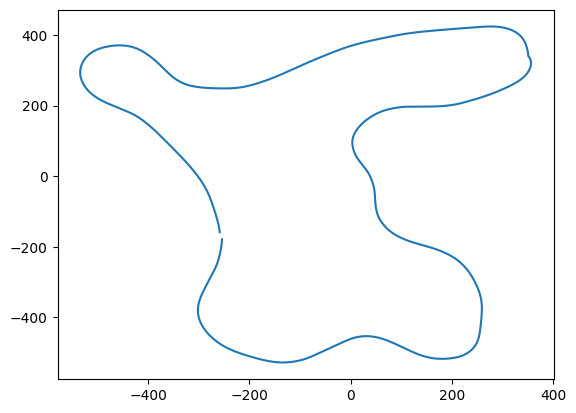

In [18]:
sns.lineplot(x=position[:,0], y=position[:,2], sort=False)

In [19]:
def read_data_from_subjects():
    dataset = []
    folder = '../data/subjects-xy/'
    files = os.listdir(folder)

    for f in files:
        data = pd.read_csv(folder + f, delimiter=";").to_numpy()
        positions = data[:,[2, 4]]
        dataset.append(positions)

    return dataset

In [20]:
dataset = read_data_from_subjects()

In [35]:
def plot_trajectories(optimal_path, real_path):
    f, ax = plt.subplots(1, 1, figsize=(10, 8))

    for i in range(int(len(real_path) / 2)):
        ax = sns.lineplot(
            x=real_path[i*2][:,0], 
            y=real_path[i*2][:,1], 
            sort=False, 
            color="gray", linewidth=0.25
        )

    ax = sns.lineplot(x=optimal_path[:,0], y=optimal_path[:,1], sort=False, color="maroon")

In [36]:
optimal_path = pd.read_csv('../data/trajectories/optimal_path.csv', delimiter=";").to_numpy()
optimal_heading = pd.read_csv('../data/trajectories/optimal_heading.csv', delimiter=";").to_numpy()

In [30]:
optimal_path.shape[0] == optimal_heading.shape[0]

True

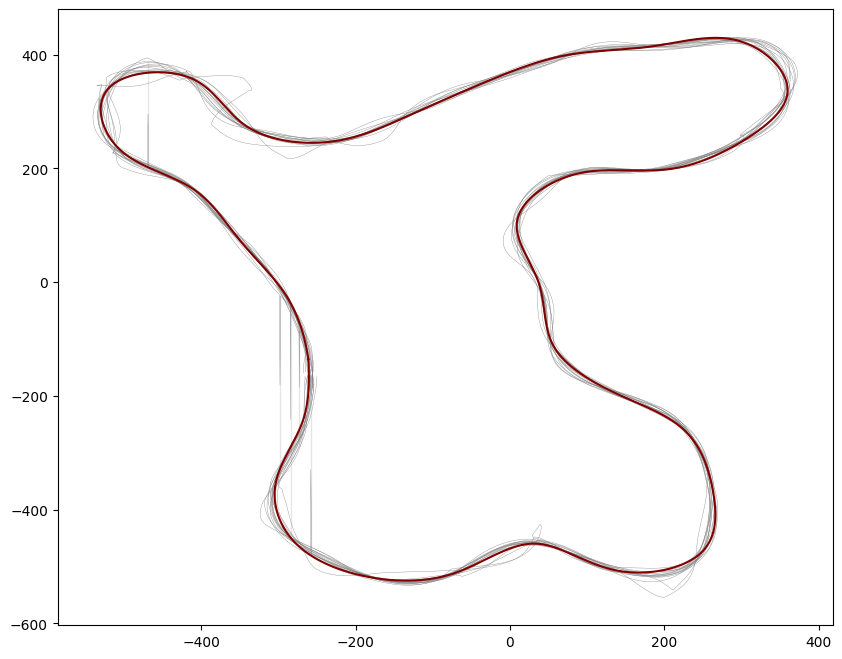

In [34]:
plot_trajectories(optimal_path, dataset)

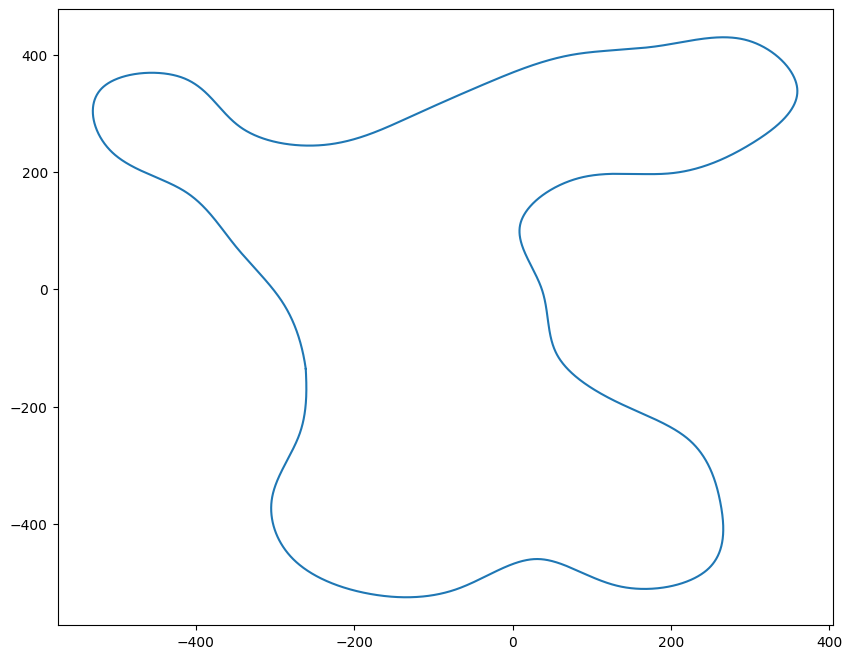

In [12]:
f, ax = plt.subplots(1, 1, figsize=(10, 8))
ax = sns.lineplot(x=optimal_path[:,0], y=optimal_path[:,1], sort=False)

In [14]:
sample_data = pd.read_csv('../data/subject3_1.csv', delimiter=";")

In [15]:
sample_data.head(5)

,Timestamp,Lap_Number,Position.x.,Position.y.,Position.z.,Orientation.x.,Orientation.y.,Orientation.z.,Path_Deviation,Estimated_Path_Center.x.,Estimated_Path_Center.y.,Estimated_Path_Center.z.,Gaze_Location.x.,Gaze_Location.y.,Gaze_Location.z.,Subject
0,1681827797703,0,-255.4,347.2259,-182.4447,0.155342,0.0,0.0,1.8052,-253.6159,243.8401,-182.1695,-292.2738,357.403943,247.076529,3
1,1681827797720,0,-255.4,347.2675,-182.2537,0.223266,0.0,0.0,1.7761,-253.6447,243.8605,-181.9830,-273.2335,354.166250,168.754000,3
2,1681827797736,0,-255.4,347.3056,-182.0298,0.302043,0.0,0.0,1.7419,-253.6784,243.8844,-181.7643,-273.2335,354.166250,168.754000,3
3,1681827797753,0,-255.4,347.3404,-181.7739,0.390675,0.0,0.0,1.7029,-253.7170,243.9149,-181.5143,-273.2335,354.166250,168.754000,3
4,1681827797770,0,-255.4,347.3720,-181.4870,0.488227,0.0,0.0,1.6592,-253.7602,243.9506,-181.2341,-273.2335,354.166250,168.754000,3


In [17]:
sample_path = sample_data.iloc[:,[2, 4]].to_numpy()

<Axes: >

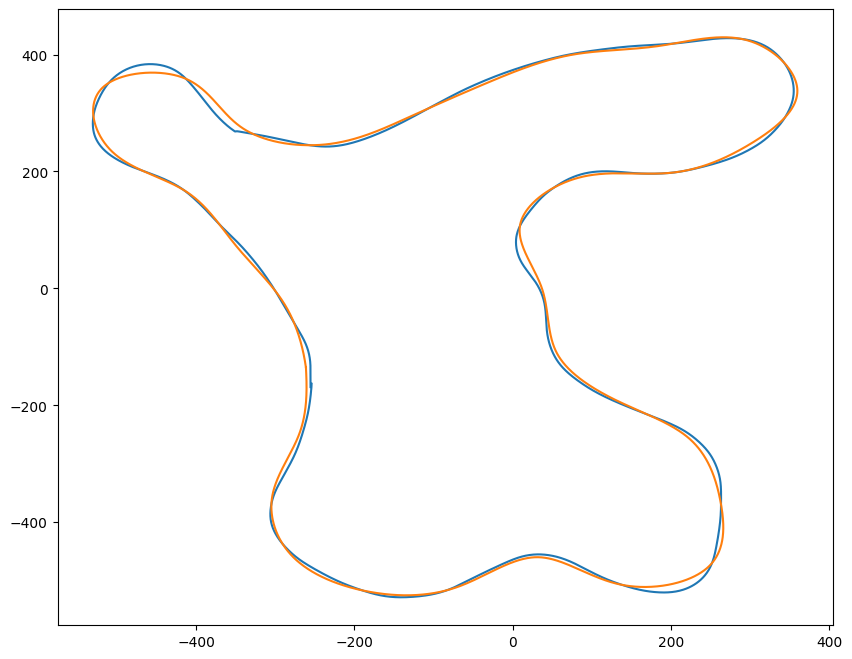

In [22]:
f, ax = plt.subplots(1, 1, figsize=(10, 8))
sns.lineplot(x=sample_path[:,0], y=sample_path[:,1], sort=False)
sns.lineplot(x=optimal_path[:,0], y=optimal_path[:,1], sort=False)


<Axes: >

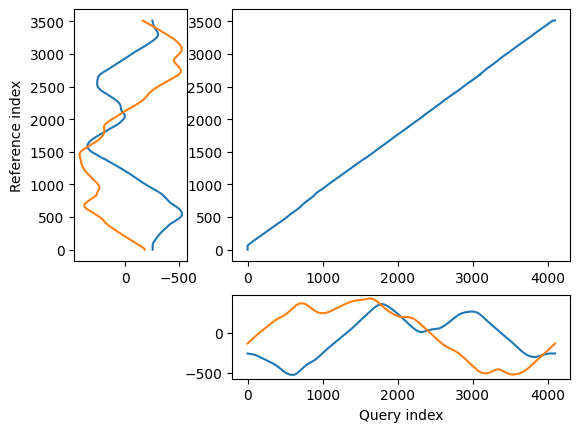

In [21]:
from dtw import *

timewarp = dtw(optimal_path, sample_path, keep_internals=True)
timewarp.plot(type="threeway")

## List of parameters and their meanings


| Symbol | Name | Description | 
| --- | --- | --- |
| $t$ | Timestamp | Timestamp for the flied trajectory |
| $\mathbf{x}$ | Position.x./y./z. | Position of the drone |
| $\theta$ | Orientation.x./y./z. | Orientation of the drone |
| $P$ | Collision\_Target | Point for the collision |
| $\Delta$ | Path\_Deviation | Deviation from the path |
| $p$ | gaze\_point\_3d\_y | Point of gaze in screen coordinates |